### IDs:
Insert yours IDs to the cell below

ID #1: 301672028

ID #2: 204502926


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
%matplotlib inline
import warnings
import matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

In [2]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [3]:
def hw1_1_nbinom_helper(r, p, requested_prob):
    """
    :return: the number of Bernoulli(p) trials required to reach r successes with probability of requested_prob 
    """
    X = stats.nbinom(r, p, loc=r)
    
    trials = r
    while True:
        prob = X.cdf(trials)
        if prob >= requested_prob:
            return trials
        trials += 1

In [4]:
# A Geometric Distribution is a Negative Binomial Distribution with r = 1
# "The distribution of the number of trials (in some versions – “failures”) needed until the r’th success"
p = 3/100.0
r = 1
target_probability = 0.85
print(f"1.A: We ask for [{hw1_1_nbinom_helper(r, p, target_probability)}] independent samples to have a {target_probability*100}% certainty of having at least {r} defective product in the batch")

1.A: We ask for [63] independent samples to have a 85.0% certainty of having at least 1 defective product in the batch


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [5]:
p = 4/100.0
r = 1
target_probability = 0.95
print(f"1.B: We ask for [{hw1_1_nbinom_helper(r, p, target_probability)}] independent samples to have a {target_probability*100}% certainty of having at least {r} defective product in the batch")

1.B: We ask for [74] independent samples to have a 95.0% certainty of having at least 1 defective product in the batch


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [6]:
p = 10/100.0
r = 5
target_probability = 0.9
m = 3 # some integer for scaling

print(f"1.C.1: We ask for [{hw1_1_nbinom_helper(r, p, target_probability)}] independent samples to have a {target_probability*100}% certainty of having at least {r} defective products in the batch")
print(f"1.C.2: We ask for [{hw1_1_nbinom_helper(m*r, m*p, target_probability)}] independent samples to have a {target_probability*100}% certainty of having at least {m*r} defective products in the batch")

1.C.1: We ask for [78] independent samples to have a 90.0% certainty of having at least 5 defective products in the batch
1.C.2: We ask for [64] independent samples to have a 90.0% certainty of having at least 15 defective products in the batch


#### 1.c Explanation
The distribution we chose is Negative Binomial, since we are looking for the number of trials until the r$^{th}$ success. <br>
In our case, a "success" will be a defective product in the batch. <br>

Let's examine the Mean and Variance:

$$ r=5, \;\; p=0.1, \;\; m=3 $$ <br>
$$ X\sim NB({{r}}, {{p}}) \rightarrow X\sim NB({{5}}, {{0.1}}) $$ <br>
$$ Y\sim NB({{rm}}, {{pm}}) \rightarrow Y\sim NB({{15}}, {{0.3}}) $$ <br>
$$ E(X) = \frac{r}{p} = 50 $$ <br>
$$ E(Y) = \frac{rm}{pm} = 50 $$ <br>
$$ V(X) = \frac{r(1-p)}{p^2} = 450 $$ <br>
$$ V(Y) = \frac{rm(1-pm)}{(pm)^2} = 116\frac{2}{3} $$ <br>

Using math-based-intuition - the results make sense: <br>
The mean is equal (we want 3 times more defective items in section 2 than we want in section 1, but the probability for a defective item is also 3 times larger),<br>
while $V(Y) < V(X)$ - this means that the critical mass of Y is more centered around its mean, so it makes sense that Y will reach 90% first. <br>

To further examine: <br>
$$CDF_X(50) \sim0.56$$ <br>
$$CDF_Y(50) \sim0.55$$ <br>

Meaning: 
1. After 50 samples - the probability of X and Y to reach their number of successes is very close.  
2. It's smaller than 0.9, so they will have to move farther away from the mean.    

Since $V(Y) < V(X)$, Y will gain more critical mass more quickly. <br>
Therefore, we can expect that Y will reach 90% sooner than X. <br>

**Extra:** <br>

A strong intuition can also be derived from Tchebysheff’s theorem: <br>

$$ P(\mu-b\sigma<=Y<=\mu+b\sigma>=1-(\frac{1}{b^2}) $$ <br>
We are looking for >= 0.9, so:  
$$ 1-(\frac{1}{b^2}) = 0.9 \rightarrow b = \sqrt\frac{1}{0.1} $$ <br>
We get:  
$$ P(-17.08 <= X <= 117.08)>=0.9 $$ <br>
$$ P(15.84 <= Y <= 84.15)>=0.9 $$ <br>

Reminding that:
$$ \forall x: x<=4: P(X=x) = 0 \;\; and \; \forall y: y<=14: P(Y=y) = 0 $$ <br>   

Actually, it is interesting to see if a bit more general theorem can be assumed (but that's out of the scope of the question):    
$$ \forall X, Y \; such \; that: $$ <br>
$$ X\sim NB({{r_x}}, {{p_x}}), \;\;\; Y\sim NB({{r_y}}, {{p_y}}), \;\;\; V(Y) < V(X) $$ <br>
$$ let \; y\in\Omega \; be \; the \; smallest \; that \; fulfills: CDF_Y(y)>=0.9 $$ <br>
$$ let \; x\in\Omega \; be \; the \; smallest \; that \; fulfills: CDF_X(x)>=0.9 $$ <br>
$$ \rightarrow y<x $$ <br>
$$ Specifically, \; for \; the \; case \; of \; r_y = r_xm, \;\;\; p_y = p_xm, \;\;\;m > 1, \;\;\;p_y<1 \; indeed: V(Y) < V(X) $$

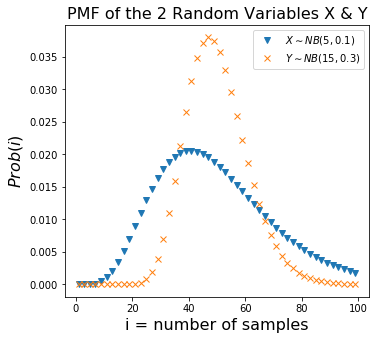

In [7]:
r = 5
p = 0.1
m = 3

X = stats.nbinom(r, p, loc=5)
Y = stats.nbinom(r*m, p*m, loc=15)

i = range(1, 100, 2)

p_X_i = X.pmf(i)
p_Y_i = Y.pmf(i)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(i, p_X_i, 'v', label="$X\sim NB({{{0}}}, {{{1:.1f}}})$".format(r, p))
plt.plot(i, p_Y_i, 'x', label="$Y\sim NB({{{0}}}, {{{1:.1f}}})$".format(r*m, p*m))
plt.title("PMF of the 2 Random Variables X & Y", fontsize=16)
plt.xlabel("i = number of samples", fontsize=16)
plt.ylabel("$Prob(i)$", fontsize=16)
plt.legend()
print()

#### 1.c Explanation - cont.
We can see both intervals where P(X) > P(Y) and P(Y) > P(X).  
For example, there's a higher probability that X will reach his goal on the 20th attempt.    
However, on the 50th attempt - Y has the higher probability.  
This plot is not good enough to conclude which of X or Y will first reach 90% probability, and when.  
Actually, we are interesred in the **cumulative probabilities**.  
Let's plot them, and then we would be able to clearly see when each random variable reaches 90% probability.

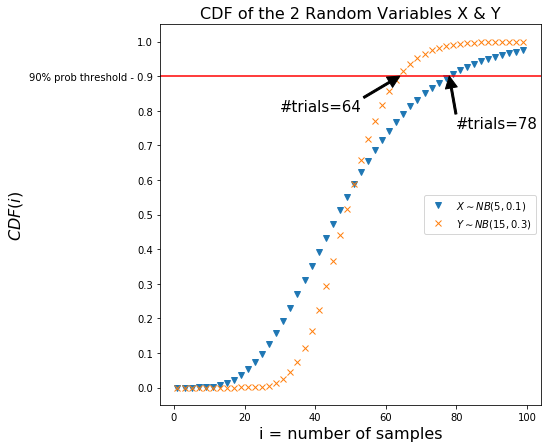

In [8]:
X = stats.nbinom(r, p, loc=r)
Y = stats.nbinom(r*m, p*m, loc=r*m)

i = range(1, 100, 2)

p_X_i = X.cdf(i)
p_Y_i = Y.cdf(i)

plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(i, p_X_i, 'v', label="$X\sim NB({{{0}}}, {{{1:.1f}}})$".format(r, p))
plt.plot(i, p_Y_i, 'x', label="$Y\sim NB({{{0}}}, {{{1:.1f}}})$".format(r*m, p*m))

plt.title("CDF of the 2 Random Variables X & Y", fontsize=16)
plt.xlabel("i = number of samples", fontsize=16)
plt.ylabel("$CDF(i)$", fontsize=16)

ax = plt.gca()
ax.axhline(0.9, c='r');

ax.annotate('#trials=78', xy=(78, 0.9), xytext=(80, 0.75), size=15,
             arrowprops=dict(facecolor='black', width=2));

ax.annotate('#trials=64', xy=(64, 0.9), xytext=(30, 0.8), size=15,
             arrowprops=dict(facecolor='black', width=2));

ax.set_yticks(np.arange(0, 1.01, 0.1))

a=[np.round(y, 1) for y in ax.get_yticks().tolist()]

a[9]='90% prob threshold - 0.9'
ax.set_yticklabels(a)

plt.legend(loc='right')
print()

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [9]:
class Q2Utils:
    """ Q2 util methods """
    
    @staticmethod
    def dist_stats(dist, title):
        pop = len(dist)
        mean = np.mean(dist)
        median = np.median(dist)
        iqr = stats.iqr(dist)
        var = np.var(dist)
        print(f"[{title}] pop: {pop} median: {median} mean: {mean} iqr: {iqr} var: {var}")
        return pop, mean, median, iqr, var

    @staticmethod
    def hist_helper(title, sh, rg):
        sh_pop, sh_mean, sh_median, sh_iqr, sh_var = Q2Utils.dist_stats(sh, 'SH')
        rg_pop, rg_mean, rg_median, rg_iqr, rg_var = Q2Utils.dist_stats(rg, 'RG')

        fig, ax = plt.subplots(2, figsize=(16, 12))

        min_x = min(np.min(sh), np.min(rg))
        max_x = max(np.max(sh), np.max(rg))

        bins = np.arange(min_x - 1600, max_x + 1000, 100)
        ax[0].hist(sh, color='C0', bins=bins);
        ax[1].hist(rg, color='C1', bins=bins);

        fig.suptitle(title, fontsize=16)
        ax[0].set_title('Stochastic Heights')
        ax[1].set_title('Random Grove')

        ax[0].set_xlabel('rent (in RCU)', fontsize=14)
        ax[0].set_ylabel('number of people', fontsize=14)
        ax[1].set_xlabel('rent (in RCU)', fontsize=14)
        ax[1].set_ylabel('number of people', fontsize=14)
        
        max_y = 2500
        ax[0].set_ylim([0,max_y])
        ax[1].set_ylim([0,max_y])

        ax[0].text(min_x - 2200, max_y - 750, f'pop: {sh_pop}\nmean: {sh_mean:.1f}\nmedian: {sh_median:.1f}\nIQR: {sh_iqr:.1f}\nvar: {sh_var}')
        ax[1].text(min_x - 2200, max_y - 750, f'pop: {rg_pop}\nmean: {rg_mean:.1f}\nmedian: {rg_median:.1f}\nIQR: {rg_iqr:.1f}\nvar: {rg_var}')

    @staticmethod
    def stats_2c(title, rent, phi, alpha):
        Q2Utils.dist_stats(rent, f'{title} Rent')
        Q2Utils.dist_stats(phi, f'{title} PHI')
        np_cov = np.cov(rent, phi)[0, 1]
        expected_cov = alpha * math.sqrt(np.var(rent)) * math.sqrt(np.var(phi))
        print(f"[{title}] Cov: {np_cov:.3f} Expected_Cov: {expected_cov:.3f} Cov/Expected_Cov={np_cov/expected_cov*100.0:.3f}%")
        
    @staticmethod
    def heatmap_helper(rent, phi, n_bins, title):
    
        plt.hist2d(rent, phi, bins=n_bins, normed=False, cmap='plasma')

        cb = plt.colorbar()
        cb.set_label('# households', fontsize=18)

        plt.title(title, fontsize=20)
        plt.xlabel('Rent', fontsize=18)
        plt.ylabel('PHI', fontsize=18)

        plt.show()

[SH] pop: 16000 median: 4600.0 mean: 6300.0 iqr: 4700.0 var: 5908000.0
[RG] pop: 22000 median: 4600.0 mean: 4200.0 iqr: 5600.0 var: 9130000.0


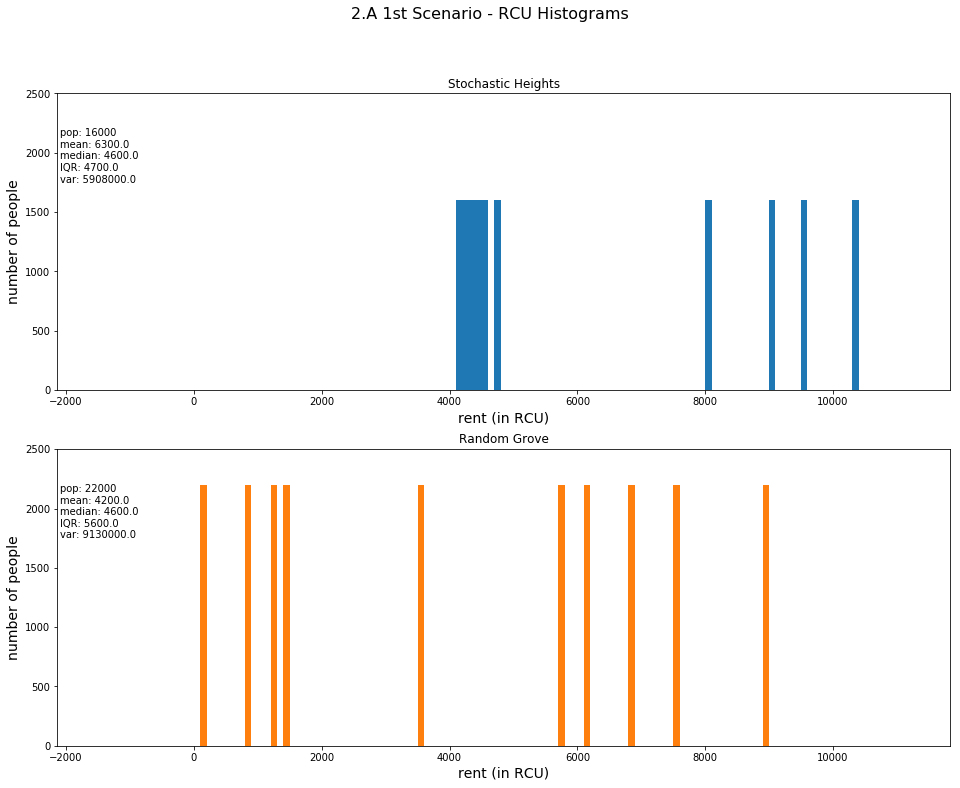

In [10]:
sh = np.array([4100, 4200, 4300, 4400, 4500, 4700, 8000, 9000, 9500, 10300])
sh = np.repeat(sh, 1600)

rg = np.array([100, 800, 1200, 1400, 3500, 5700, 6100, 6800, 7500, 8900])
rg = np.repeat(rg, 2200)

Q2Utils.hist_helper('2.A 1st Scenario - RCU Histograms', sh, rg)

[SH] pop: 16000 median: 4600.0 mean: 6300.0 iqr: 4700.0 var: 5908000.0
[RG] pop: 22000 median: 4600.0 mean: 4200.0 iqr: 5600.0 var: 9294000.0


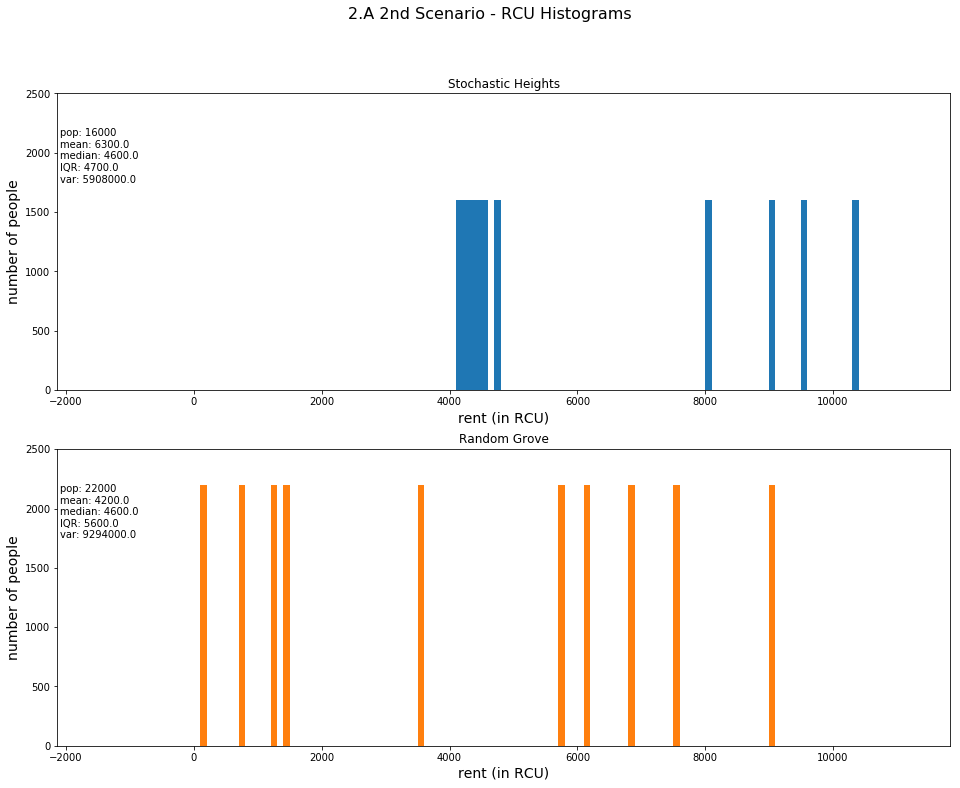

In [11]:
sh = np.array([4100, 4200, 4300, 4400, 4500, 4700, 8000, 9000, 9500, 10300])
sh = np.repeat(sh, 1600)

rg = np.array([100, 700, 1200, 1400, 3500, 5700, 6100, 6800, 7500, 9000])
rg = np.repeat(rg, 2200)

Q2Utils.hist_helper('2.A 2nd Scenario - RCU Histograms', sh, rg)

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

[SH] pop: 16000 median: 4600.0 mean: 6300.0 iqr: 4700.0 var: 14068000.0
[RG] pop: 22000 median: 4600.0 mean: 4200.0 iqr: 5600.0 var: 9294000.0


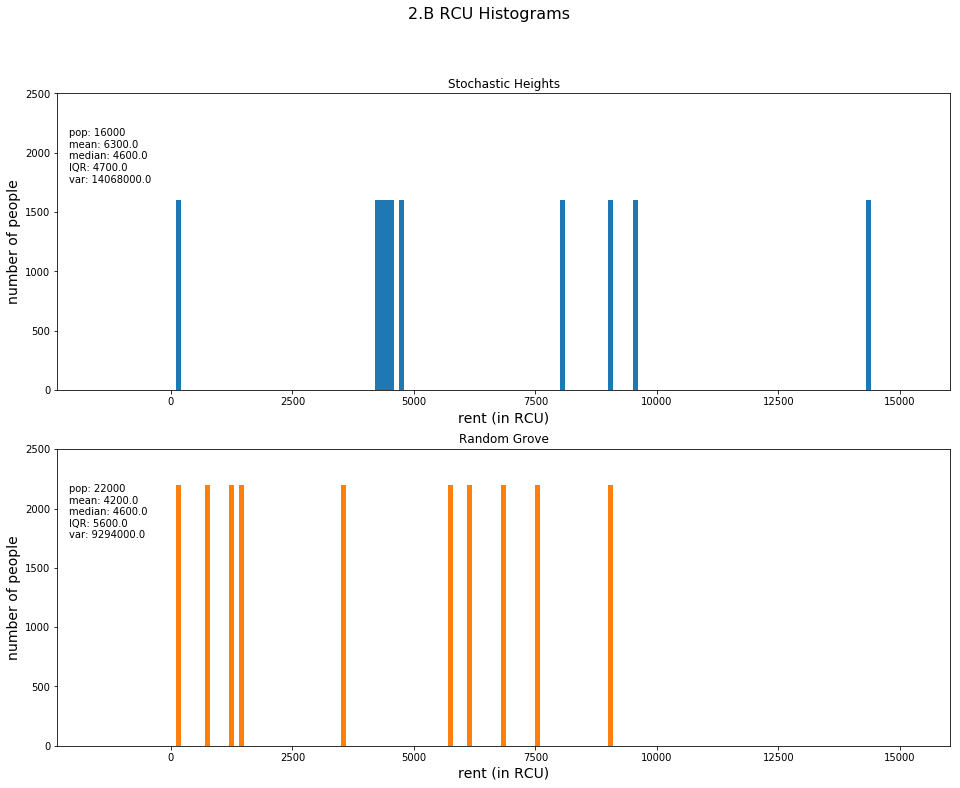

In [12]:
sh = np.array([100, 4200, 4300, 4400, 4500, 4700, 8000, 9000, 9500, 14300])
sh = np.repeat(sh, 1600)

rg = np.array([100, 700, 1200, 1400, 3500, 5700, 6100, 6800, 7500, 9000])
rg = np.repeat(rg, 2200)

Q2Utils.hist_helper('2.B RCU Histograms', sh, rg)

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [13]:
sh_rent = np.repeat(np.array([100, 2200, 4300, 4400, 4500, 4700, 8000, 8300, 9500, 17000]), 1600)
sh_phi = np.repeat(np.array([100, 1200, 2300, 5000, 11000, 13000, 13400, 19000, 20700, 39300]), 1600)

rg_rent = np.repeat(np.array([1300, 1400, 1900, 2700, 4500, 4700, 5900, 6000, 6100, 7500]), 2200)
rg_phi = np.repeat(np.array([5100, 7200, 7300, 7400, 7500, 8500, 9000, 9500, 10500, 13000]), 2200)

print("2.C\n")
Q2Utils.stats_2c('SH', sh_rent, sh_phi, 0.97)
print()
Q2Utils.stats_2c('RG', rg_rent, rg_phi, 0.89)

2.C

[SH Rent] pop: 16000 median: 4600.0 mean: 6300.0 iqr: 4000.0 var: 20028000.0
[SH PHI] pop: 16000 median: 12000.0 mean: 12500.0 iqr: 16700.0 var: 127278000.0
[SH] Cov: 48732045.753 Expected_Cov: 48974182.672 Cov/Expected_Cov=99.506%

[RG Rent] pop: 22000 median: 4600.0 mean: 4200.0 iqr: 4100.0 var: 4476000.0
[RG PHI] pop: 22000 median: 8000.0 mean: 8500.0 iqr: 2200.0 var: 4240000.0
[RG] Cov: 3891176.872 Expected_Cov: 3877197.945 Cov/Expected_Cov=100.361%


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

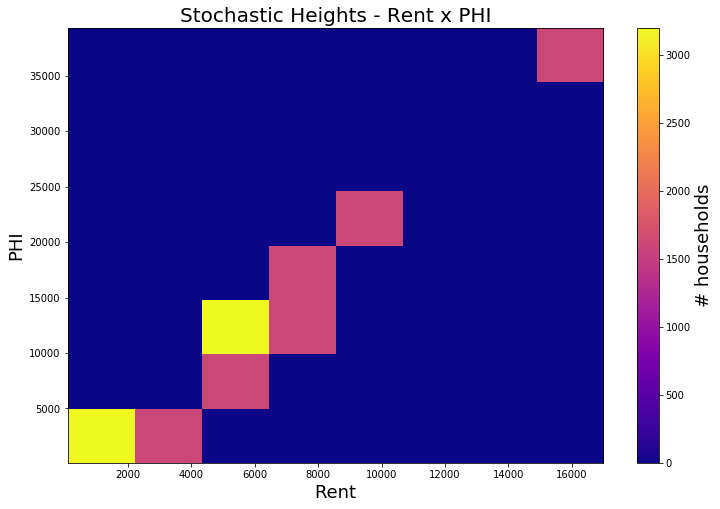

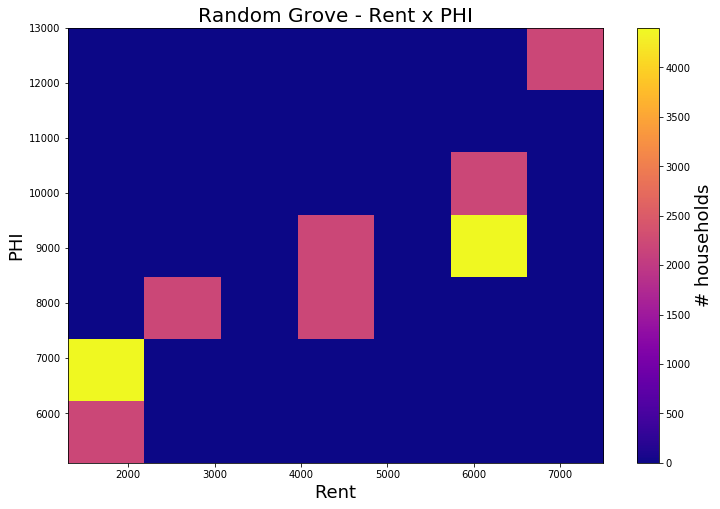

In [14]:
# The number of bins chosen was set after playing with the numbers:
# We wanted to show some trend between the 2 axes and the variety with the heatmap's bins' colors
# With numbers too high, all colors are the same, and the trend is less visible
# With numbers too low, we get big squares that don't show clear information

Q2Utils.heatmap_helper(sh_rent, sh_phi, n_bins=8, title='Stochastic Heights - Rent x PHI')
Q2Utils.heatmap_helper(rg_rent, rg_phi, n_bins=7, title='Random Grove - Rent x PHI')

### Question 3 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

### 3 - Answer
***
Let's expand the equation by the definition of variance:
\begin{equation*}
V(X + Y + Z) = E[(X + Y + Z)^2] - [E(X + Y + Z)]^2
\end{equation*}

Let's elaborate the <u>first term</u> first: 
$$ E[(X + Y + Z)^2] =$$
$$E[X^2 + 2XY + 2XZ + Y^2 + 2YZ + Z^2] =$$
$$E(X^2) + 2E(XY) + 2E(XZ) + E(Y^2) + 2E(YZ) + E(Z^2)$$
(The last step is due to the linearity of Expectations)

<u>Second term</u>: 
$$ [E(X + Y + Z)]^2 =$$
$$[E(X) + E(Y) + E(Z)]^2 =$$
$$[E(X)]^2 + 2E(X)E(Y) + 2E(X)E(Z) + [E(Y)]^2 + 2E(Y)E(Z) + [E(Z)]^2$$

After expanding these terms in the original equation, we move some terms around and get:
$$V(X + Y + Z) =$$
$$E(X^2) - [E(X)]^2 + E(Y^2) - [E(Y)]^2 + E(Z^2) - [E(Z)]^2 + 2[E(XY) - E(X)E(Y)] + 2[E(XZ) - E(X)E(Z)] + 2[E(YZ) - E(Y)E(Z)] =$$

Finally, (and after using the mathematical definition of variance) we are left with:
$$V(X) + V(Y) + V(Z) + 2[Cov(X,Y) + Cov(X,Z) + Cov(Y,Z)]$$

Now, as we learned in class, for every pair of independent RVs, A and B $\rightarrow$ $$Cov(A,   B) = 0$$

Therefore, if X,Y,Z are **pairwise-independent**, the variance is <u>additive</u>:
$$V(X + Y + Z) = V(X) + V(Y) + V(Z)$$

***
**If X,Y,Z are pairwise-independent - they're not necessarily collectively-independent** (a.k.a. "mutually-independent")<br>
Consider this <u>counter example</u>:<br>
We toss 3 coins, one after the other.  

$X = #1s in the 1st toss$  
$Y = #1s in the 2nd toss$     
$Z = #1s in the 3rd toss$     


\begin{equation*} \Omega=000, 011, 101, 110 \\ Thus: P(X=0) = P(Y=0) = P(Z=0) = \frac{1}{2} \end{equation*}    


The "story": The 3rd coin performs a XOR operation on the results of the first 2 tosses.  

$X, Y$ are independent:  
\begin{equation*} P(X = 0 \cap Y = 0) = \frac{1}{4} = P(X = 0)P(Y = 0) \end{equation*} 
Similarly, $X,Z$ and $Y,Z$ are pairwise-independent.  
However, they are not collectively-independent:  
\begin{equation*}
P(X = 0 \cap Y = 0 \cap Z = 0) = \frac{1}{4} \ne \frac{1}{8} = P(X = 0)P(Y = 0)P(Z = 0)
\end{equation*}

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [15]:
from collections import defaultdict

def print_dist(d):
    for k, v in d.items():
        print(f"z={k}: P(z)={v}")

def Conv2(P1, P2):
    Q = defaultdict(float)
    
    for x, px in P1.items():
        for y, py in P2.items():
            Q[x + y] += px * py
    
    return dict(Q)

def NFoldConv(P, n):
    """
    :param P: distribution of a random variable that takes finitely many integer values
    :param n: positive integer
    :return: distribution Q, of the sum of n independent repeats of random variables, 
                 each of which has the distribution P
    """
    Q = P
    
    for i in range(1, n):
        Q = Conv2(P, Q)
    
    return Q

#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [16]:
tosses = 17
faces = 8

P_fair_octahedron = {toss_result:1 / faces for toss_result in range(1, faces + 1)}
Q = NFoldConv(P_fair_octahedron, tosses)

print("The distribution of the sum of the results of rolling a fair octahedron 17 times:")
print_dist(Q)

The distribution of the sum of the results of rolling a fair octahedron 17 times:
z=17: P(z)=4.440892098500626e-16
z=18: P(z)=7.549516567451064e-15
z=19: P(z)=6.794564910705958e-14
z=20: P(z)=4.303224443447107e-13
z=21: P(z)=2.1516122217235534e-12
z=22: P(z)=9.036771331238924e-12
z=23: P(z)=3.313482821454272e-11
z=24: P(z)=1.088715784192118e-10
z=25: P(z)=3.2660718574106795e-10
z=26: P(z)=9.07134811711785e-10
z=27: P(z)=2.3577291230481023e-09
z=28: P(z)=5.782673007104222e-09
z=29: P(z)=1.3473395732432891e-08
z=30: P(z)=2.998400727705075e-08
z=31: P(z)=6.401734875538523e-08
z=32: P(z)=1.3161584089260714e-07
z=33: P(z)=2.613809253482202e-07
z=34: P(z)=5.027422242953605e-07
z=35: P(z)=9.38663699212583e-07
z=36: P(z)=1.7045993589981379e-06
z=37: P(z)=3.015970226893927e-06
z=38: P(z)=5.206881849684208e-06
z=39: P(z)=8.783168114145923e-06
z=40: P(z)=1.449303744882613e-05
z=41: P(z)=2.3418493098503745e-05
z=42: P(z)=3.7090165106334894e-05
z=43: P(z)=5.762708941681183e-05
z=44: P(z)=8.79011760

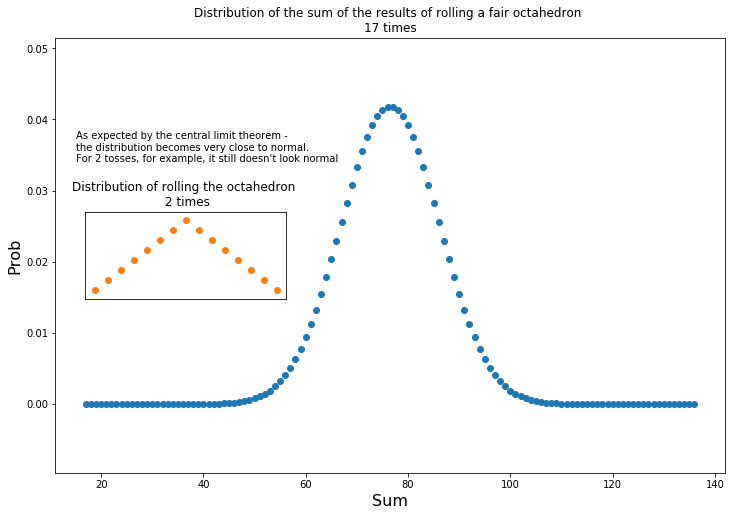

In [18]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

octahedron_2_tosses = NFoldConv(P_fair_octahedron, n=2)

fig, ax = plt.subplots()
plt.scatter(Q.keys(), Q.values(), c='C0', marker='o')
plt.title('Distribution of the sum of the results of rolling a fair octahedron \n17 times')
plt.xlabel('Sum', fontsize=16)
plt.ylabel('Prob', fontsize=16)

axins2 = inset_axes(ax, width="30%", height="20%", loc=6, borderpad=3)

axins2.scatter(octahedron_2_tosses.keys(), octahedron_2_tosses.values(), c='C1')
axins2.set_title('Distribution of rolling the octahedron \n 2 times')
axins2.tick_params(labelleft=False, labelbottom=False, which='both', bottom=False, left=False)

ax.text(15, 0.034, "As expected by the central limit theorem - \nthe distribution becomes very close to normal. \nFor 2 tosses, for example, it still doesn't look normal")
plt.show()

#### 4.C
Assume that the price of a stock changes in any given day according to (in NIS):

$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.3 & 0.15 & 0.15 & 0.15 & 0.25
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

In [19]:
P_stock = {-1: 0.3, 0: 0.15, 1: 0.15, 2: 0.15, 3: 0.25}

print("The distribution after 2 consecutive days:")
print_dist(NFoldConv(P_stock, 2))

print()

print("The distribution after 5 consecutive days:")
print_dist(NFoldConv(P_stock, 5))

The distribution after 2 consecutive days:
z=-2: P(z)=0.09
z=-1: P(z)=0.09
z=0: P(z)=0.1125
z=1: P(z)=0.135
z=2: P(z)=0.21749999999999997
z=3: P(z)=0.12
z=4: P(z)=0.0975
z=5: P(z)=0.075
z=6: P(z)=0.0625

The distribution after 5 consecutive days:
z=-5: P(z)=0.00243
z=-4: P(z)=0.006075
z=-3: P(z)=0.012150000000000001
z=-2: P(z)=0.021262499999999997
z=-1: P(z)=0.038221874999999995
z=0: P(z)=0.05373843749999999
z=1: P(z)=0.07074843749999998
z=2: P(z)=0.0872015625
z=3: P(z)=0.10407656249999998
z=4: P(z)=0.1071984375
z=5: P(z)=0.10638843749999999
z=6: P(z)=0.0996890625
z=7: P(z)=0.0886078125
z=8: P(z)=0.0683578125
z=9: P(z)=0.05170781249999999
z=10: P(z)=0.0363571875
z=11: P(z)=0.023367187499999997
z=12: P(z)=0.0120703125
z=13: P(z)=0.0064453125
z=14: P(z)=0.0029296875
z=15: P(z)=0.0009765625


2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 4NIS? Explain your answers.

In [24]:
dist_after_5_days = NFoldConv(P_stock, 5)
prob_of_gaining_more_than_7 = sum([p for gain, p in dist_after_5_days.items() if gain > 7]) # we filter only the relevant gain we want and sum over the list of probabilities we were left with after filtering
prob_of_losing_more_than_4 = sum([p for gain, p in dist_after_5_days.items() if gain < -4])

print(f"The probability that the stock has gained strictly more than 7 NIS after 5 days: {prob_of_gaining_more_than_7}")
print("This is simply the sum of all numbers (probabilities) where z (the gain for the stock after 5 days) is larger than 7")

print()
print(f"The probability that the stock has lost strictly more than 4 NIS after 5 days: {prob_of_losing_more_than_4}")
print("This is simply the sum of all numbers (probabilities) where z (the gain for the stock after 5 days) is smaller than 4")

The probability that the stock has gained strictly more than 7 NIS after 5 days: 0.202211875
This is simply the sum of all numbers (probabilities) where z (the gain for the stock after 5 days) is larger than 7

The probability that the stock has lost strictly more than 4 NIS after 5 days: 0.00243
This is simply the sum of all numbers (probabilities) where z (the gain for the stock after 5 days) is smaller than 4
